### FYS-STK4155 Project 1

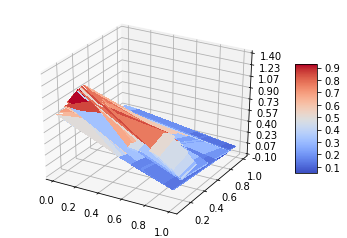

In [2]:
# The Franke function (code provided in the assignment text)

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
#a = np.arange(0, 1, 0.05)
#b = np.arange(0, 1, 0.05)
a = np.random.rand(20,1)
b = np.random.rand(20,1)
x, y = np.meshgrid(a,b)

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

z = FrankeFunction(x,y) #+ 0.1*np.random.randn(20,1)

# Plot the surface
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [86]:
#def linreg_ols(x,y,z):
#    # Vandermonde matrix
#    X = np.c_[np.ones((20,1)), x, y, x*x, x*y, y*y]
#    
#    assert np.linalg.det(np.transpose(X).dot(X) != 0, "Matrix not singular")
#    
#    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(z)
#    
#    y_predict_ols = X @ beta
#    
#    return y_predict_ols

In [87]:
#x = np.random.rand(20,1)
#y = np.random.rand(20,1)
#z = FrankeFunction(x,y)
#
#y_predict_ols = linreg_ols(x,y,z)

In [3]:
# Vandermonde matrix
X = np.c_[np.ones((20,1)), a, b, a*a, a*b, b*b]

assert np.linalg.det(X.T.dot(X)) != 0, "Matrix not singular"

In [101]:
beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(z)

In [102]:
#x = np.random.rand(20,1)
#y = np.random.rand(20,1)
#x, y = np.meshgrid(x,y)

# PRØV Å FÅ DET TIL Å VÆRE DE SAMME x- OG y-VERDIENE SOM OVER (SEED)

X = np.c_[np.ones((20,1)), a, b, a*a, a*b, b*b]

#print(np.linalg.det(X.T.dot(X)))

beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(z)

In [103]:
y_predict_ols = X @ beta

In [92]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

In [104]:
print(R2(y_predict_ols, z))

0.9063068683064651


In [ ]:
def linreg_ols(x,y,z):
    # Vandermonde matrix
    X = np.c_[np.ones((20,1)), x, y, x*x, x*y, y*y]
    
    assert np.linalg.det(np.transpose(X).dot(X) != 0, "Matrix not singular")
    
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(z)
    
    y_predict_ols = X @ beta
    
    return y_predict_ols

In [42]:
x = np.arange(0, 3, 1)
y = np.arange(0, 3, 1)
n = 5

# Vandermonde matrix of degree n
X = np.c_[np.ones(len(x))]
for i in range(1, n+1):
    # x-terms
    X = np.c_[X, x**(i)]
    # y-terms
    X = np.c_[X, y**(i)]
    # Cross terms
    for j in range(i-1, 0, -1):
        X = np.c_[X, (x**(j))*(y**(i-j))]
        
print(X.shape[0])
print((X.T.dot(X)).shape[0])

3
21


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.]
 [ 1.  2.  2.  4.  4.  4.  8.  8.  8.  8. 16. 16. 16. 16. 16. 32. 32. 32.
  32. 32. 32.]] [0 1 2]


In [65]:
from random import randrange
def k_fold(data, k):
    k_fold_data = list()
    
    copy_list = list(data)
    fold_size = int(len(data)/k)
    
    for i in range(k):
        fold = list()
        while len(fold) < fold_size:
            i = randrange(len(copy_list))
            fold.append(copy_list.pop(i))

        k_fold_data.append(fold)
    
    return k_fold_data

In [66]:
data = [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
k = 4

folds = k_fold(data, k)

print(folds)


[[[3], [7]], [[4], [8]], [[2], [9]], [[10], [6]]]
